#  Applied Machine Learning 

## Homework 6: Putting it all together 



## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
#pip install sklearn.plot_confusion_matrix

In [2]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,make_scorer#plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score, cross_validate,train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

### Here there are 24 Features which are as below:<br>

- **ID:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Identifier of Each Client
<br><br>
- **LIMIT_BAL:**&emsp;&emsp;&emsp;&emsp; Amount of given credit in NT dollars (includes individual and family/supplementary credit
<br><br>
- **SEX:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Gender (1=male, 2=female)
<br><br>
- **EDUCATION:** &emsp;&emsp;&emsp;&ensp;(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br><br>
- **MARRIAGE:** &emsp;&emsp;&emsp;&emsp;Marital status (1=married, 2=single, 3=others)
<br><br>
- **AGE:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Age in years
<br><br>
- **PAY_1:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for &ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&nbsp;&emsp;&ensp;two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
<br><br>
- **PAY_2:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in August, 2005 (scale same as above)
<br><br>
- **PAY_3:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in July, 2005 (scale same as above)
<br><br>
- **PAY_4:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in June, 2005 (scale same as above)
<br><br>
- **PAY_5:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in May, 2005 (scale same as above)
<br><br>
- **PAY_6:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;Repayment status in April, 2005 (scale same as above)
<br><br>
- **BILL_AMT1:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in September, 2005 (NT dollar)
<br><br>
- **BILL_AMT2:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in August, 2005 (NT dollar)
<br><br>
- **BILL_AMT3:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in July, 2005 (NT dollar)
<br><br>
- **BILL_AMT4:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in June, 2005 (NT dollar)
<br><br>
- **BILL_AMT5:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in May, 2005 (NT dollar)
<br><br>
- **BILL_AMT6:** &emsp;&emsp;&emsp;&emsp;Amount of bill statement in April, 2005 (NT dollar)
<br><br>
- **PAY_AMT1:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in September, 2005 (NT dollar)
<br><br>
- **PAY_AMT2:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in August, 2005 (NT dollar)
<br><br>
- **PAY_AMT3:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in July, 2005 (NT dollar)
<br><br>
- **PAY_AMT4:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in June, 2005 (NT dollar)
<br><br>
- **PAY_AMT5:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in May, 2005 (NT dollar)
<br><br>
- **PAY_AMT6:** &emsp;&emsp;&emsp;&ensp;&ensp;&ensp;Amount of previous payment in April, 2005 (NT dollar)
<br><br>
- **DEFAULT:** &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Default payment (Fail to Pay) (1=yes, 0=no)

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [4]:
df= df.set_index("ID")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
X_test

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
2452    340000.0    1          3         1   40      0      0      0      0   
2731     50000.0    1          3         2   30      1      2      3      2   
16575    30000.0    1          2         2   24      2     -1     -1     -2   
22094    80000.0    2          1         2   28      1     -2     -2     -2   
4295     50000.0    1          2         2   23      1      2      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
23053   120000.0    2          1         2   27     -1     -1     -2     -2   
8752    200000.0    1          1         2   28     -1      2     -1     -1   
3340    550000.0    1          1         1   49     -1     -1     -1     -1   
17009    50000.0    2          2         2   24      2      2      2      2   
21811   140000.0    2          3         2   26      2      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
ID            ...                                                         
2452       0  ...    60396.0    63720.0    65211.0    60053.0    5305.0   
2731       2  ...    32600.0    31777.0    33966.0    34759.0    3000.0   
16575     -2  ...        0.0        0.0        0.0        0.0     780.0   
22094     -2  ...        0.0        0.0        0.0        0.0       0.0   
4295       0  ...    18245.0    18454.0    18685.0    19271.0       0.0   
...      ...  ...        ...        ...        ...        ...       ...   
23053     -2  ...        0.0        0.0        0.0        0.0       0.0   
8752      -2  ...    99165.0        0.0        0.0        0.0       0.0   
3340      -1  ...     1488.0    18334.0     -114.0     -114.0    1522.0   
17009      2  ...    51450.0    47867.0    51045.0    51118.0    2100.0   
21811      0  ...   142802.0   140103.0   142750.0   142855.0    5301.0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
ID                                                       
2452     3000.0    5000.0    3000.0    5000.0    6000.0  
2731        0.0       0.0    2700.0    1500.0       0.0  
16575       0.0       0.0       0.0       0.0       0.0  
22094       0.0       0.0       0.0       0.0       0.0  
4295     1299.0     807.0     678.0     897.0     800.0  
...         ...       ...       ...       ...       ...  
23053       0.0       0.0       0.0       0.0       0.0  
8752    99165.0       0.0       0.0       0.0    3090.0  
3340     1495.0   18426.0       0.0       0.0   22670.0  
17009    2200.0       0.0    4300.0    2100.0       0.0  
21811    5400.0    5100.0    5300.0    5500.0    5400.0  

[6000 rows x 23 columns]

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 



# 1) How big is the data ?

In [8]:
df.shape

(30000, 24)

# 2) How dose the data look like?

In [9]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5       0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  
5     9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

In [10]:
df.sample(5)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
19867   160000.0    2          2         1   39      0      0     -2     -2   
1212    160000.0    2          3         2   26     -1     -1     -1     -1   
14927   230000.0    2          1         1   24     -1     -1     -1      0   
8949     60000.0    2          2         1   28      0      0      0      0   
20588   100000.0    1          1         2   29      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
19867     -1  ...        0.0      390.0    86188.0       0.0       0.0   
1212      -1  ...      390.0      390.0      390.0     390.0     390.0   
14927      0  ...    10086.0     6905.0      237.0   35000.0   44884.0   
8949       0  ...    28393.0    29149.0    28819.0    1463.0    1447.0   
20588      0  ...    61796.0    62602.0    64983.0    5003.0    5003.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                                         
19867       0.0     390.0   86188.0    3272.0                           0  
1212      390.0     390.0     390.0     390.0                           0  
14927     202.0     405.0     237.0    3566.0                           0  
8949     1393.0    1200.0    1000.0    1283.0                           1  
20588    1723.0    3115.0    3000.0    3000.0                           0  

[5 rows x 24 columns]

# 3) What is the data type of column ?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# 4) Are there any missing values ?? 

In [12]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

*  every value are not_null in this data so they  data will  be going data preprocesseing..

# 5) how dose the data look like mathmetically ?

In [13]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

# 6) Are there any duplicate value in dataset? 

In [14]:
df.duplicated().sum()
#if data in duplication value first of all duplicat value are remove in data set:

35

* if data in duplication value first of all duplicat value are remove in data set:

In [15]:
df.drop_duplicates()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41      1     -1      0      0   
30000    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...        0.0        0.0        0.0       0.0     689.0   
2          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
3          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
4          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
5          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29997      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29998      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29999      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
30000      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                                         
1           0.0       0.0       0.0       0.0                           1  
2        1000.0    1000.0       0.0    2000.0                           1  
3        1000.0    1000.0    1000.0    5000.0                           0  
4        1200.0    1100.0    1069.0    1000.0                           0  
5       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29996    5003.0    3047.0    5000.0    1000.0                           0  
29997    8998.0     129.0       0.0       0.0                           0  
29998   22000.0    4200.0    2000.0    3100.0                           1  
29999    1178.0    1926.0   52964.0    1804.0                           1  
30000    1430.0    1000.0    1000.0    1000.0                           1  

[29965 rows x 24 columns]

# 7) How is the correlation between columns ? 

In [16]:
df.corr()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.021602   
BILL_AMT3                    0.283236 -0.024563   0.013002 -0.024909   
BILL_AMT4                    0.293988 -0.021880  -0.000451 -0.023344   
BILL_AMT5                    0.295562 -0.017005  -0.007567 -0.025393   
BILL_AMT6                    0.290389 -0.016733  -0.009099 -0.021207   
PAY_AMT1                     0.195236 -0.000242  -0.037456 -0.005979   
PAY_AMT2                     0.178408 -0.001391  -0.030038 -0.008093   
PAY_AMT3                     0.210167 -0.008597  -0.039943 -0.003541   
PAY_AMT4                     0.203242 -0.002229  -0.038218 -0.012659   
PAY_AMT5                     0.217202 -0.001667  -0.040358 -0.001205   
PAY_AMT6                     0.219595 -0.002766  -0.037200 -0.006641   
default.payment.next.month  -0.153520 -0.039961   0.028006 -0.024339   

                                 AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
LIMIT_BAL                   0.144713 -0.271214 -0.296382 -0.286123 -0.267460   
SEX                        -0.090874 -0.057643 -0.070771 -0.066096 -0.060173   
EDUCATION                   0.175061  0.105364  0.121566  0.114025  0.108793   
MARRIAGE                   -0.414170  0.019917  0.024199  0.032688  0.033122   
AGE                         1.000000 -0.039447 -0.050148 -0.053048 -0.049722   
PAY_0                      -0.039447  1.000000  0.672164  0.574245  0.538841   
PAY_2                      -0.050148  0.672164  1.000000  0.766552  0.662067   
PAY_3                      -0.053048  0.574245  0.766552  1.000000  0.777359   
PAY_4                      -0.049722  0.538841  0.662067  0.777359  1.000000   
PAY_5                      -0.053826  0.509426  0.622780  0.686775  0.819835   
PAY_6                      -0.048773  0.474553  0.575501  0.632684  0.716449   
BILL_AMT1                   0.056239  0.187068  0.234887  0.208473  0.202812   
BILL_AMT2                   0.054283  0.189859  0.235257  0.237295  0.225816   
BILL_AMT3                   0.053710  0.179785  0.224146  0.227494  0.244983   
BILL_AMT4                   0.051353  0.179125  0.222237  0.227202  0.245917   
BILL_AMT5                   0.049345  0.180635  0.221348  0.225145  0.242902   
BILL_AMT6                   0.047613  0.176980  0.219403  0.222327  0.239154   
PAY_AMT1                    0.026147 -0.079269 -0.080701  0.001295 -0.009362   
PAY_AMT2                    0.021785 -0.070101 -0.058990 -0.066793 -0.001944   
PAY_AMT3                    0.029247 -0.070561 -0.055901 -0.053311 -0.069235   
PAY_AMT4                    0.021379 -0.064005 -0.046858 -0.046067 -0.043461   
PAY_AMT5                    0.022850 -0.058190 -0.037093 -0.035863 -0.033590   
PAY_AMT6                    0.019478 -0.058673 -0.036500 -0.035861 -0.026565   
default.payment.next.month  0.013890  0.324794  0.263551  0.235253  0.216614   

                               PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
LIMIT_BAL                  -0.249411  ...   0.293988   0.295562   0.290389   
SEX                        -0.055064  ...  -0.021880  -0.017005  -0.01

# Let's going on the Exploratory Data Analysis (EDA).

(array([7.676e+03, 4.822e+03, 3.902e+03, 3.978e+03, 2.905e+03, 2.154e+03,
        1.206e+03, 1.553e+03, 5.730e+02, 1.025e+03, 7.600e+01, 5.100e+01,
        3.700e+01, 1.900e+01, 1.700e+01, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  10000.,   59500.,  109000.,  158500.,  208000.,  257500.,
         307000.,  356500.,  406000.,  455500.,  505000.,  554500.,
         604000.,  653500.,  703000.,  752500.,  802000.,  851500.,
         901000.,  950500., 1000000.]),
 <BarContainer object of 20 artists>)

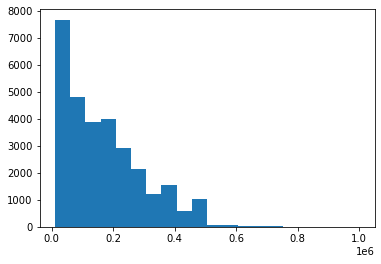

In [17]:
# for  Univariate  nummerical Analysis:
plt.hist(df["LIMIT_BAL"],bins=20)

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

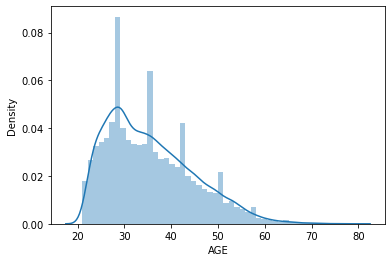

In [18]:
sns.distplot(df["AGE"])

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BILL_AMT4'>

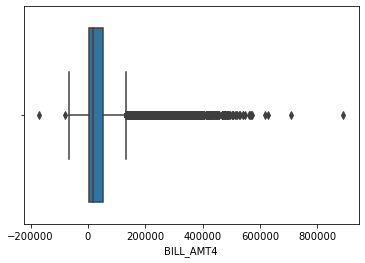

In [19]:
sns.boxplot(df["BILL_AMT4"])

In [20]:
#for  Univariate  catagorical Analysis:

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


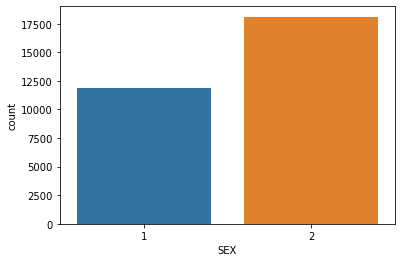

In [21]:
sns.countplot(df["SEX"])
xlabel='SEX'
ylabel='count'

Hint:Here First of all  CountChart of SEX , we can easily say Female are dominating rather than male !

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


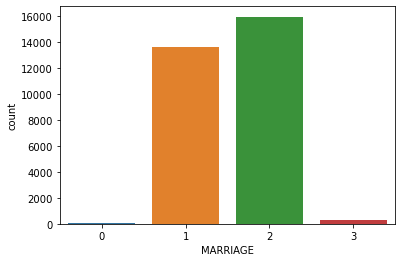

In [22]:
sns.countplot(df["MARRIAGE"])
xlabel='marriage'
ylabel='count'

Hint:e chart of MARRIAGE, there is also confusion but not worse than 2nd Pie chart; in this case the "OTHERS" and "MISSING" are Overalapping. and also say single and married people are uesing Credit Card. 

Text(0.5, 1.0, 'FOR EDUCATION')

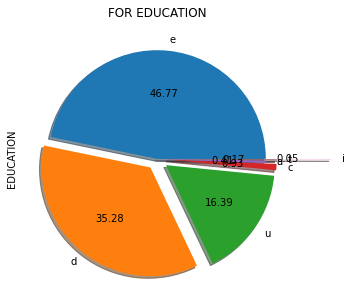

In [23]:

Edu_pie = df["EDUCATION"].value_counts().plot(kind="pie",figsize=(5,5),autopct = "%.2f",labels="education_labels",explode=(0,0.1,0.1,0.1,0,0.1,0.6),shadow=True)
Edu_pie.set_title("FOR EDUCATION")

Hint:However there is so much confusion in pie chart of EDUCATION as the Features like "Others", "Unknown_1", "Unknown_2", "Missing" are very much as Compared to Remaining Features and they are overlapping
we can also say University Aprox 50%  ,  Graduate School 35%  Are too much people uesd Credit Card . Abouslly in world Graduate peple are always using Credit Card. 

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

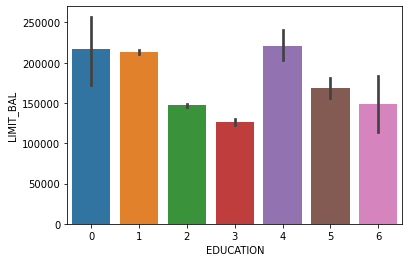

In [24]:
sns.barplot(df["EDUCATION"],df["LIMIT_BAL"])

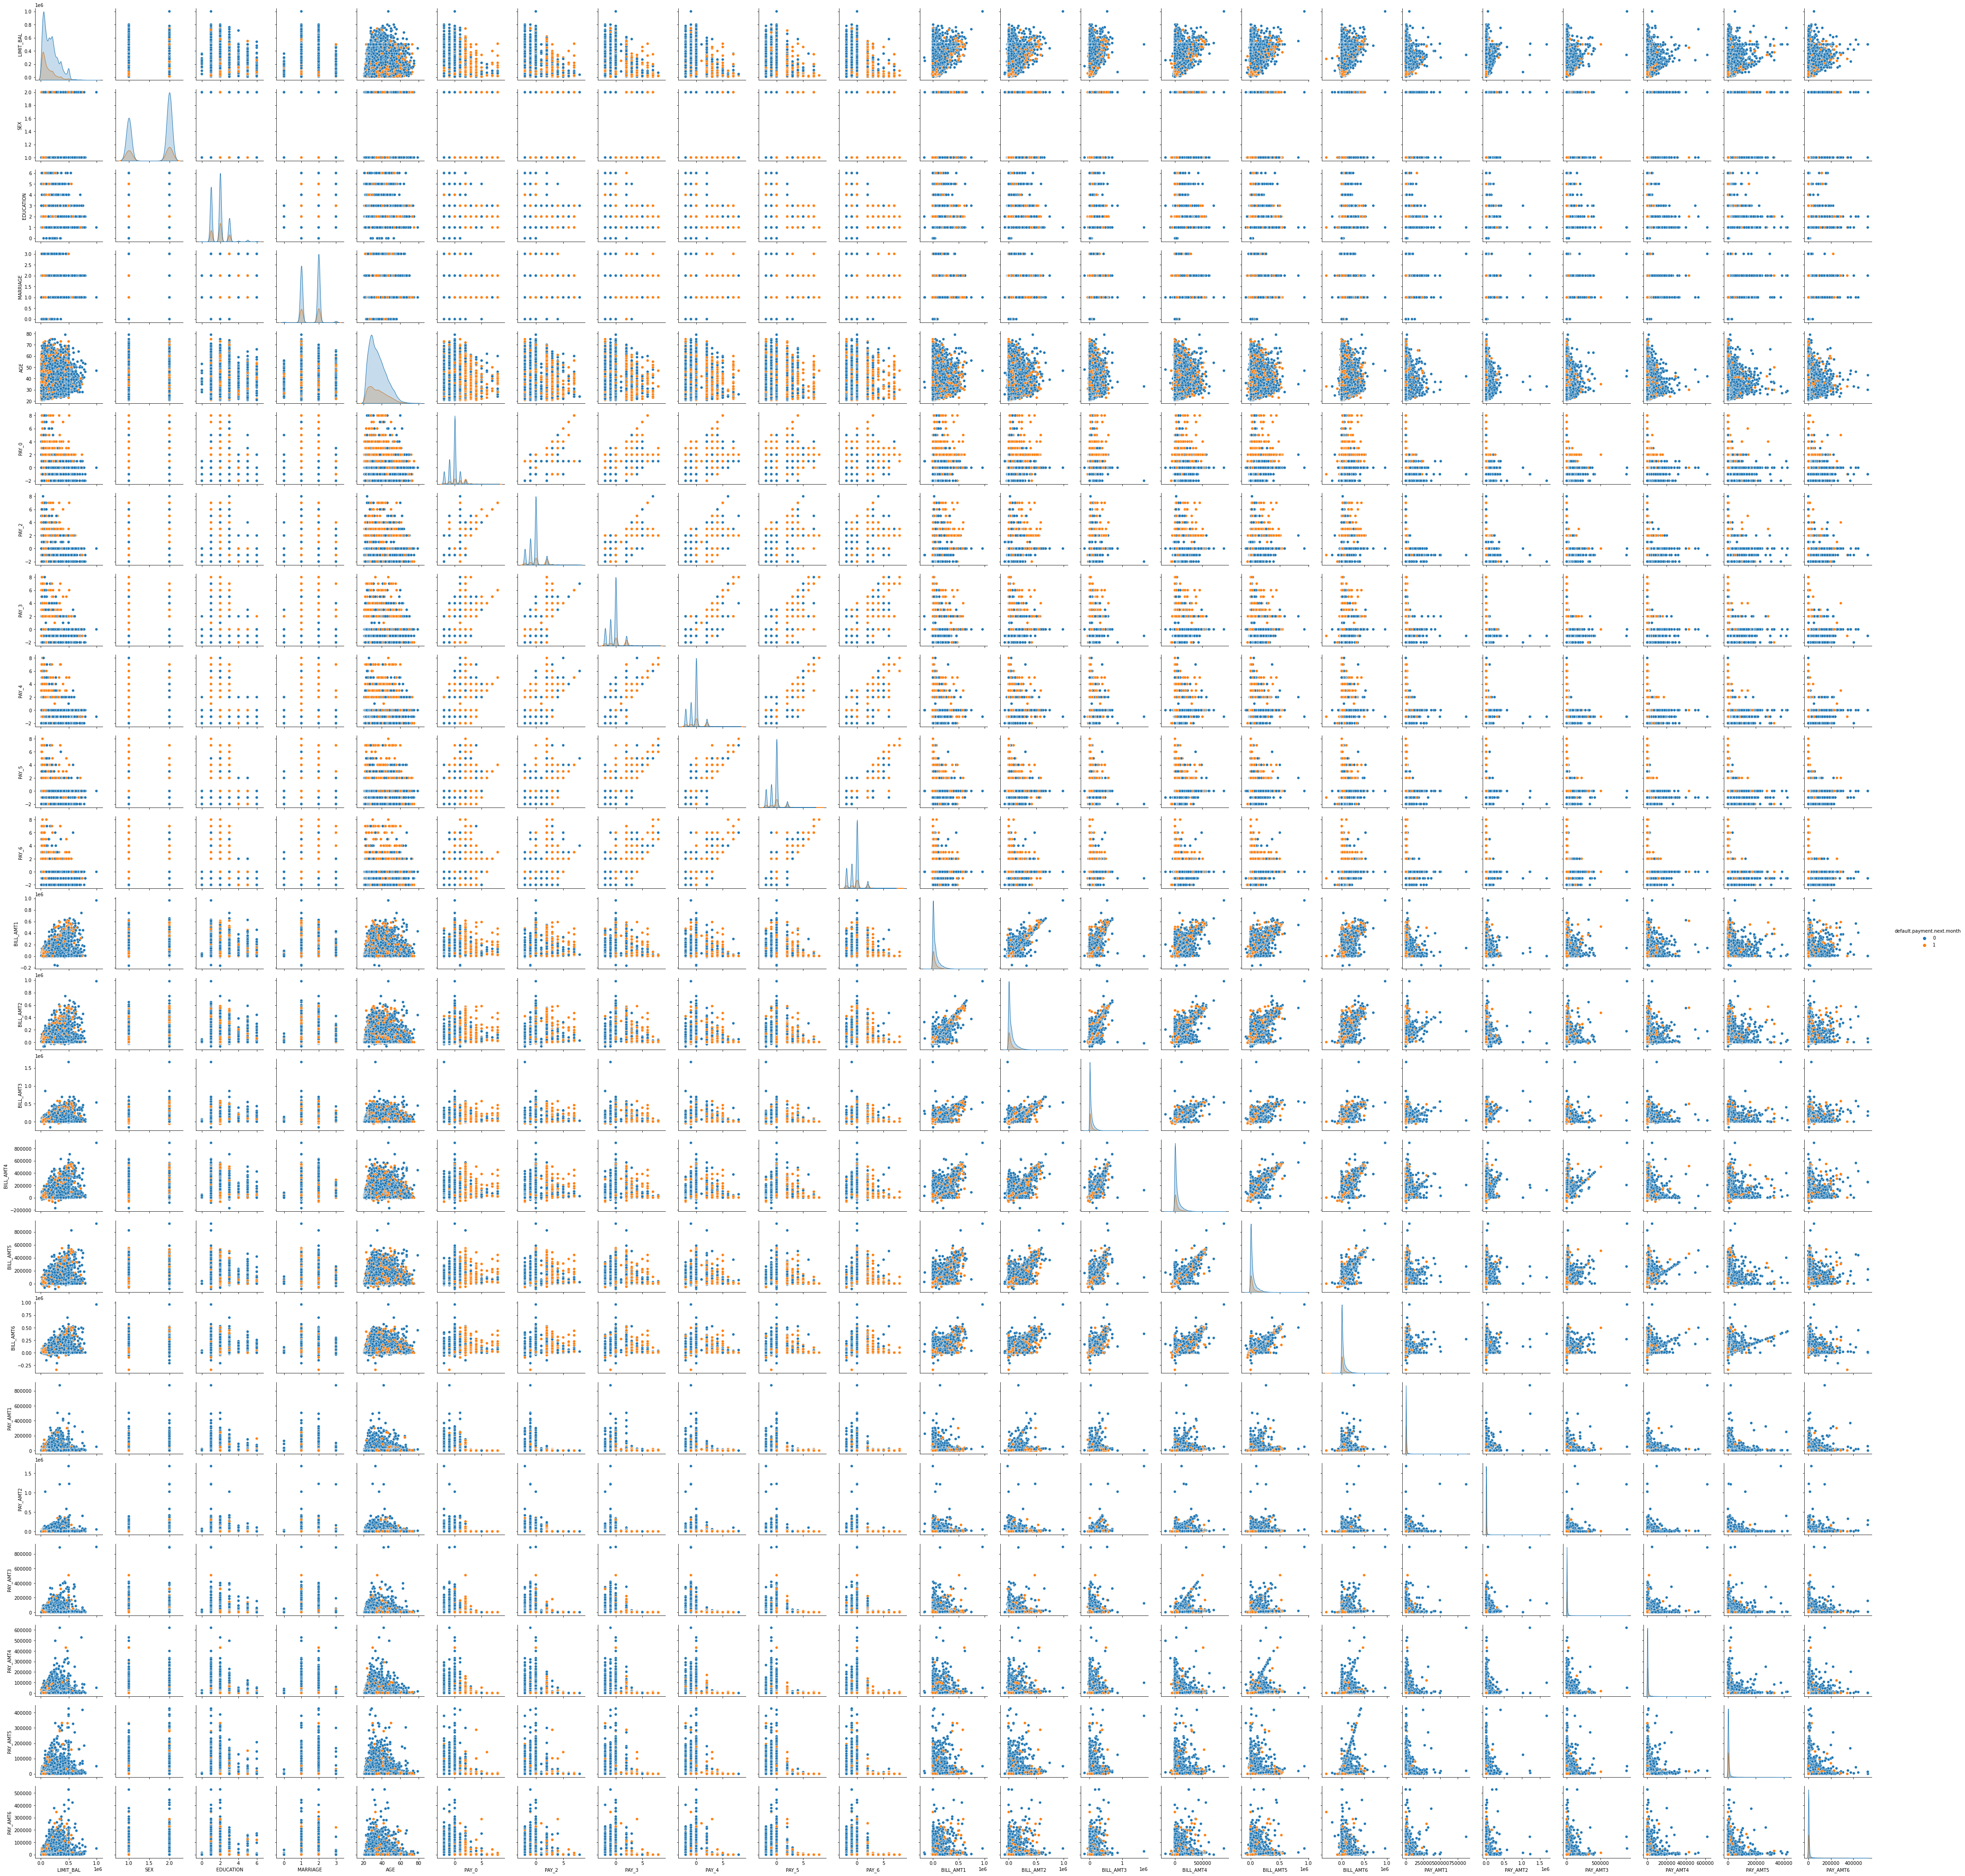

In [25]:
sns.pairplot(df,hue="default.payment.next.month")

# Multivariate Analysis:

## Exploring the Column AGE and default.payment.next.month each age "

Text(0.5, 1.0, 'Distribution of AGE with Respect to Default')

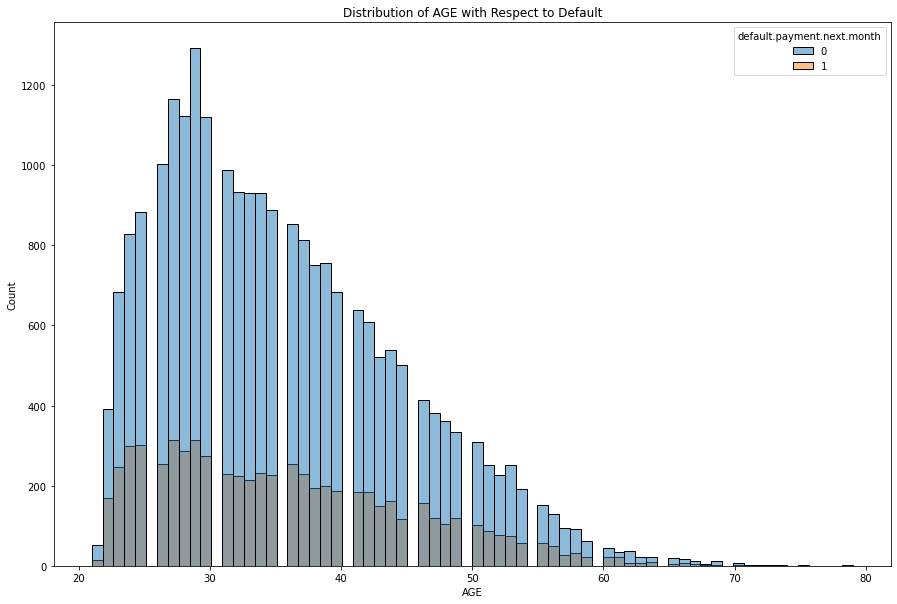

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(data=df,x="AGE",hue="default.payment.next.month")
ax.set_title("Distribution of AGE with Respect to Default")

# Show all each data exaploring in Heatmep

Text(0.5, 1.0, 'Heatmap describing the Correlation')

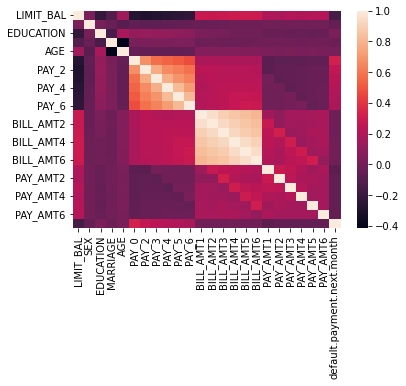

In [26]:
#fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr())
ax.set_title("Heatmap describing the Correlation",fontdict={"fontsize":20,"fontweight":"bold"})

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [27]:
df["MARRIAGE"].value_counts().nunique



<bound method IndexOpsMixin.nunique of 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64>

In [28]:
df["EDUCATION"].value_counts().nunique:
    
    
# EDUCATION:     (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)



SyntaxError: invalid syntax (4044373766.py, line 1)

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

# Step:1In Dataset Transformation  each Column:

| Transformation     |      Columns      | 
|--------------------|-------------------|
| **Scaling**        | "LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"                   |
| **OneHotEncoding** | "EDUCATION", "MARRIAGE"                  |  
| **Binary**         | "SEX",                    |  
| **Drop**           | "ID"              |
| **Passthrough**    | "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"           | 

In [29]:
numerical_feats = ["LIMIT_BAL","AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
categorical_feats = ["EDUCATION","MARRIAGE"]
binary_feats = ["SEX"]
#drop_feats = ["ID"]
passthrough_feats = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

In [30]:
column_transformer = make_column_transformer(
    (StandardScaler(),numerical_feats),
    (OneHotEncoder(handle_unknown="ignore"),categorical_feats),
    (OneHotEncoder(drop="if_binary"),binary_feats),
    
    ("passthrough",passthrough_feats)
)

In [31]:
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary'), ['SEX']),
                                ('passthrough', 'passthrough',
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

In [32]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [33]:
X_transf = column_transformer.fit_transform(X_train)



## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [34]:
Baseline_model = make_pipeline(column_transformer, DummyClassifier())
Baseline_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['EDUCATION', 'MARRIAGE']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX']),
                                                 ('passthrough', 'passthrough',
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('dummyclassifier', DummyClassifier())])

In [35]:
scores = cross_validate(Baseline_model,X_train,y_train,cv=10,n_jobs=-1,return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

fit_time  score_time  test_score  train_score
0  0.031384    0.000000    0.779583     0.779491
1  0.015629    0.015624    0.779583     0.779491
2  0.031425    0.000000    0.779583     0.779491
3  0.031255    0.015621    0.779583     0.779491
4  0.031244    0.000000    0.779583     0.779491
5  0.031248    0.000000    0.779583     0.779491
6  0.031247    0.000000    0.779583     0.779491
7  0.031246    0.000000    0.779583     0.779491
8  0.015631    0.015626    0.779167     0.779537
9  0.015631    0.000000    0.779167     0.779537

<AxesSubplot:>

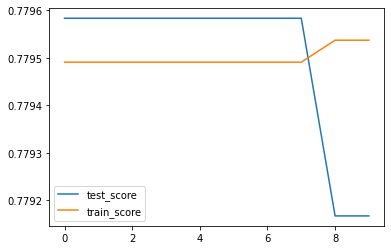

In [36]:
df_scores[["test_score","train_score"]].plot()

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [37]:
Logistic_Regression_Model= make_pipeline(column_transformer,LogisticRegression(max_iter=1000,n_jobs=-1))
Logistic_Regression_Model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['EDUCATION', 'MARRIAGE']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX']),
                                                 ('passthrough', 'passthrough',
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, n_jobs=-1))])

In [38]:
param_grid = [{
    "logisticregression__C" : np.logspace(-4, 4, 10)
    }
]

In [39]:
gcv = GridSearchCV(Logistic_Regression_Model,param_grid,cv=5,n_jobs=-1,return_train_score=True,verbose=True)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6']),
                                                                        ('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [...
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])}],
             return_train_score=True, verbose=True)

In [40]:
cv_scores = pd.DataFrame(gcv.cv_results_).T
cv_scores

0  \
mean_fit_time                                         0.224525   
std_fit_time                                          0.029125   
mean_score_time                                       0.028274   
std_score_time                                        0.005578   
param_logisticregression__C                             0.0001   
params                       {'logisticregression__C': 0.0001}   
split0_test_score                                     0.783542   
split1_test_score                                       0.7825   
split2_test_score                                     0.782917   
split3_test_score                                     0.783125   
split4_test_score                                     0.783333   
mean_test_score                                       0.783083   
std_test_score                                        0.000358   
rank_test_score                                             10   
split0_train_score                                    0.783542   
split1_train_score                                    0.783438   
split2_train_score                                    0.783125   
split3_train_score                                    0.782969   
split4_train_score                                    0.783125   
mean_train_score                                       0.78324   
std_train_score                                       0.000214   

                                                                           1  \
mean_fit_time                                                       0.273343   
std_fit_time                                                        0.018743   
mean_score_time                                                     0.030231   
std_score_time                                                      0.002028   
param_logisticregression__C                                         0.000774   
params                       {'logisticregression__C': 0.000774263682681127}   
split0_test_score                                                   0.801667   
split1_test_score                                                   0.800208   
split2_test_score                                                   0.799375   
split3_test_score                                                   0.804167   
split4_test_score                                                   0.801875   
mean_test_score                                                     0.801458   
std_test_score                                                       0.00164   
rank_test_score                                                            9   
split0_train_score                                                  0.802708   
split1_train_score                                                  0.803125   
split2_train_score                                                  0.802448   
split3_train_score                                                  0.800469   
split4_train_score                                                  0.801562   
mean_train_score                                                    0.802062   
std_train_score                                                     0.000947   

                                                                           2  \
mean_fit_time                                                       0.267331   
std_fit_time                                                        0.007653   
mean_score_time                                                     0.018749   
std_score_time                                                      0.006251   
param_logisticregression__C                                         0.005995   
params                       {'logisticregression__C': 0.005994842503189409}   
split0_test_score                                                       0.81   
split1_test_score                                                   0.806042   
split2_test_score                                                   0.804583   
split3_test_score                              

# Now  find best Model and also find best Hyperperameter

<br><br>

In [41]:
gcv.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['EDUCATION', 'MARRIAGE']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['SEX']),
                                                 ('passthrough', 'passthrough',
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('logisticregression',
                 LogisticRegression(C=21.54434690031882, max_iter=1000,
                                    n_jobs=-1))])

In [42]:
gcv.best_params_

{'logisticregression__C': 21.54434690031882}

In [43]:
gcv.best_score_

0.811125

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## let's Try anthor itrition Variable to make algo. 

In [45]:
# Scoring Function to be Used !
scoring = [
    "accuracy",
    "recall",
    "precision",
    "f1"
]

# let's Make different different Algo.

In [46]:
# Models to be Used! 
classifiers = {
    "DecisionTree":DecisionTreeClassifier(max_depth=10),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5),
    "SuppportVector":SVC()
}

In [47]:
# Results Dict I will be Using
results_dict = {
    "model_name":[],"fit_time":[],"score_time":[],"test_accuracy": [],"train_accuracy":[],"test_recall":[],
    "train_recall": [],"test_precision":[],"train_precision":[],"test_f1":[],"train_f1":[]
}

In [56]:
for i, model in classifiers.items():
    pipe_model = make_pipeline(column_transformer,model)
    result = cross_validate(estimator=pipe_model,X=X_train,y=y_train,cv=10,n_jobs=-1,return_train_score=True,verbose=True,scoring=scoring)
    
    results_dict["model_name"].append(name)
    # print(result)
    for arg in result.keys():
        results_dict[arg].append(result[arg].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


In [73]:
results_dict

{'model_name': ['DecisionTree',
  'KNeighbors',
  'SuppportVector',
  'DecisionTree',
  'KNeighbors',
  'SuppportVector',
  'SuppportVector',
  'SuppportVector',
  'SuppportVector'],
 'fit_time': [0.2706059217453003,
  0.03750298023223877,
  35.37024347782135,
  0.26785542964935305,
  0.04450039863586426,
  34.736088728904726,
  0.27552032470703125,
  0.04729142189025879,
  35.23726217746734],
 'score_time': [0.009726667404174804,
  0.3493854522705078,
  2.484025812149048,
  0.006508278846740723,
  0.38041510581970217,
  2.6472981929779054,
  0.0074817419052124025,
  0.31172471046447753,
  2.680688810348511],
 'test_accuracy': [0.8112916666666667,
  0.7939583333333333,
  0.8204166666666666,
  0.8111666666666665,
  0.7939583333333333,
  0.8204166666666666,
  0.8110416666666668,
  0.7939583333333333,
  0.8204166666666666],
 'train_accuracy': [0.8506712962962963,
  0.843587962962963,
  0.8254444444444445,
  0.8506574074074074,
  0.843587962962963,
  0.8254444444444445,
  0.850634259259259

In [74]:
df_results = pd.DataFrame(results_dict)
df_results

model_name   fit_time  score_time  test_accuracy  train_accuracy  \
0    DecisionTree   0.270606    0.009727       0.811292        0.850671   
1      KNeighbors   0.037503    0.349385       0.793958        0.843588   
2  SuppportVector  35.370243    2.484026       0.820417        0.825444   
3    DecisionTree   0.267855    0.006508       0.811167        0.850657   
4      KNeighbors   0.044500    0.380415       0.793958        0.843588   
5  SuppportVector  34.736089    2.647298       0.820417        0.825444   
6  SuppportVector   0.275520    0.007482       0.811042        0.850634   
7  SuppportVector   0.047291    0.311725       0.793958        0.843588   
8  SuppportVector  35.237262    2.680689       0.820417        0.825444   

   test_recall  train_recall  test_precision  train_precision   test_f1  \
0     0.388891      0.476547        0.614415         0.756209  0.475819   
1     0.360732      0.471529        0.550842         0.722765  0.435700   
2     0.354687      0.368355        0.677682         0.697196  0.465274   
3     0.389648      0.476484        0.613897         0.756211  0.476240   
4     0.360732      0.471529        0.550842         0.722765  0.435700   
5     0.354687      0.368355        0.677682         0.697196  0.465274   
6     0.388324      0.475728        0.613671         0.756716  0.475095   
7     0.360732      0.471529        0.550842         0.722765  0.435700   
8     0.354687      0.368355        0.677682         0.697196  0.465274   

   train_f1  
0  0.584575  
1  0.570713  
2  0.482024  
3  0.584507  
4  0.570713  
5  0.482024  
6  0.584083  
7  0.570713  
8  0.482024

## Make Model with DecisionTree:

In [65]:
model =  DecisionTreeClassifier()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

print("training Accuracy :",model.score(X_train,y_train))
print("testting Accuracy :",model.score(X_test,y_test))

print("f1_scoree :",f1_score(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
print(cm)

training Accuracy : 0.9995
testting Accuracy : 0.7285
f1_scoree : 0.40482279868469123
[[3817  839]
 [ 790  554]]


In [67]:
model2 =  SVC()
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print("training Accuracy :",model2.score(X_train,y_train))
print("testting Accuracy :",model2.score(X_test,y_test))

print("f1_scoree :",f1_score(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
print(cm)

training Accuracy : 0.77975
testting Accuracy : 0.776
f1_scoree : 0.0
[[4656    0]
 [1344    0]]


In [69]:
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)


y_pred = model3.predict(X_test)

print("training Accuracy :",model3.score(X_train,y_train))
print("testting Accuracy :",model3.score(X_test,y_test))

print("f1_scoree :",f1_score(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
print(cm)


training Accuracy : 0.817625
testting Accuracy : 0.7536666666666667
f1_scoree : 0.2565392354124748
[[4267  389]
 [1089  255]]


<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [77]:
pipe_svc = make_pipeline(column_transformer,SVC())

params_dict = {
    'svc__C': 10.0 ** np.arange(-2,3,1),
    'svc__gamma': 10.0 ** np.arange(-2,3,1)    
}

In [78]:
gcv_ = GridSearchCV(estimator=pipe_svc,param_grid=params_dict,return_train_score=True,n_jobs=-1,verbose=True,cv=3)
gcv_.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6']),
                                                                        ('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [...CATION',
                                                                          'MARRIAGE']),
                                                                        ('onehotencoder-2',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['SEX']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             return_train_score=True, verbose=True)

In [86]:
print(gcv_.best_params_)
print(gcv_.best_index_)
print(gcv_.best_score_)


{'svc__C': 10.0, 'svc__gamma': 0.01}
15
0.8199166666666667


In [89]:
pd.DataFrame(gcv_.cv_results_).T

0   \
mean_fit_time                                  34.165569   
std_fit_time                                    0.393606   
mean_score_time                                14.991909   
std_score_time                                  1.172001   
param_svc__C                                        0.01   
param_svc__gamma                                    0.01   
params              {'svc__C': 0.01, 'svc__gamma': 0.01}   
split0_test_score                               0.780125   
split1_test_score                                 0.7795   
split2_test_score                               0.779625   
mean_test_score                                  0.77975   
std_test_score                                   0.00027   
rank_test_score                                       11   
split0_train_score                              0.779937   
split1_train_score                               0.77975   
split2_train_score                              0.779625   
mean_train_score                                0.779771   
std_train_score                                 0.000128   

                                                     1   \
mean_fit_time                                 35.948871   
std_fit_time                                   0.539016   
mean_score_time                               17.844023   
std_score_time                                 0.295823   
param_svc__C                                       0.01   
param_svc__gamma                                    0.1   
params              {'svc__C': 0.01, 'svc__gamma': 0.1}   
split0_test_score                              0.789375   
split1_test_score                                0.7915   
split2_test_score                               0.78925   
mean_test_score                                0.790042   
std_test_score                                 0.001032   
rank_test_score                                       9   
split0_train_score                             0.791562   
split1_train_score                             0.788813   
split2_train_score                             0.791312   
mean_train_score                               0.790563   
std_train_score                                0.001242   

                                                     2   \
mean_fit_time                                 63.313416   
std_fit_time                                    4.68722   
mean_score_time                               26.429125   
std_score_time                                 1.978586   
param_svc__C                                       0.01   
param_svc__gamma                                    1.0   
params              {'svc__C': 0.01, 'svc__gamma': 1.0}   
split0_test_score                                0.7795   
split1_test_score                                0.7795   
split2_test_score                                0.7795   
mean_test_score                                  0.7795   
std_test_score                                      0.0   
rank_test_score                                      12   
split0_train_score                               0.7795   
split1_train_score                               0.7795   
split2_train_score                               0.7795   
mean_train_score                                 0.7795   
std_train_score                                     0.0   

                                                      3   \
mean_fit_time                                  84.372511   
std_fit_time                                    1.296086   
mean_score_time                                 38.72976   
std_score_time                                  0.042641   
param_svc__C                                        0.01   
param_svc__gamma                                    10.0   
params              {'svc__C': 0.01, 'svc__gamma': 10.0}   
split0_test_score                                 0.7795   
split1_test_score                                 0.7795   
split2_test_score                                 0.7795   
mean_test

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

Anwers: As we can see above it has a 81.99% Accuracy which is very near to above Validation Score which was 81.11%. However, It still has some type of error because it has Recall, Precision which we have to reduce as shown in Classificaton Report.



In [90]:
gcv_.best_estimator_.score(X_test,y_test)

0.8148333333333333

In [91]:
print(classification_report(y_test,gcv_.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4656
           1       0.66      0.35      0.46      1344

    accuracy                           0.81      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

**1. Report your final test score along with the metric you used.**
- Anwers: The final score that we got is 81.11, and I have used  Accuracy metrix and its defult by cross validation for classfication.
-i also calculation and i can study in classfication report each  predict,recall,presion and also F1 score . it also given macro and  weighted Average.


**2. Write concluding remarks.**
- Mine concludtion was first of all i avoid Dummyclasifier . it was given always the frequent Category.
- and then chat was second and third model frist model are logictic regresstion and it was so good model and faster than second model . but second model (SVC) is given more accurate than any other Model but it is Very Slower than other and i  have more two  Hyperparameters :`C` and `gamma`uesd in model and then give more accurcy .


**3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability .**

- me my side i say now this dataset in no feature splitting feature engineering , also selection are not do it may be this all are work and then we will see it model are good working on dataset . much column are no meaning full in the dataset.


<br><br><br><br>